# Random Linear Classifier

Example notebook for random linear classifier including cross-validation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [2]:
np.random.seed(0)

In [3]:
# Dogs: higher ear flappiness index, lower whisker length
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=10)

In [4]:
# Cats: lower ear flappiness index, higher whisker length
cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cats_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)

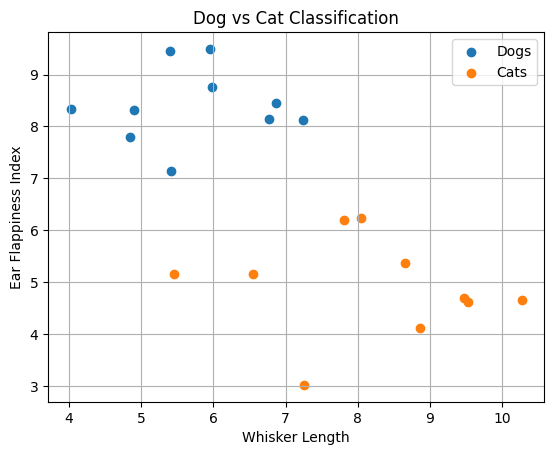

In [5]:
# Plot the data points
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label='Cats')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T
data = np.vstack((dogs_data, cats_data))
labels = np.hstack((np.zeros(len(dogs_data)), np.ones(len(cats_data))))

In [7]:
# Implementing random linear classifier algorithm
def compute_error(dogs, cats, theta, theta0):
    error = 0

    for x in dogs:
        if np.dot(theta, x) + theta0 <= 0:
            error += 1

    for x in cats:
        if np.dot(theta, x) + theta0 > 0:
            error += 1

    return error

In [8]:
def random_linear_classifier(dogs, cats, K, d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(K):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error = compute_error(dogs, cats, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0

    return best_theta, best_theta0, best_error

In [9]:
# Define function for k-fold cross-validation
def cross_validate(dogs, cats, k_values, d, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    avg_errors = []

    for k in k_values:
        errors = []
        for train_index, test_index in kf.split(dogs):
            X_train_fold = np.vstack((dogs[train_index], cats[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))
            X_test_fold = np.vstack((dogs[test_index], cats[test_index]))
            y_test_fold = np.hstack((np.zeros(len(test_index)), np.ones(len(test_index))))

            theta, theta0, _ = random_linear_classifier(X_train_fold[y_train_fold == 0], X_train_fold[y_train_fold == 1], k, d)
            error = compute_error(X_test_fold[y_test_fold == 0], X_test_fold[y_test_fold == 1], theta, theta0)
            errors.append(error)

        avg_errors.append(np.mean(errors))
    
    best_k = k_values[np.argmin(avg_errors)]
    return best_k


In [10]:
k_values = [10, 50, 100, 200]

best_k = cross_validate(dogs_data, cats_data, k_values, 2)

print(f"Best k from cross-validation: {best_k}")

Best k from cross-validation: 100


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

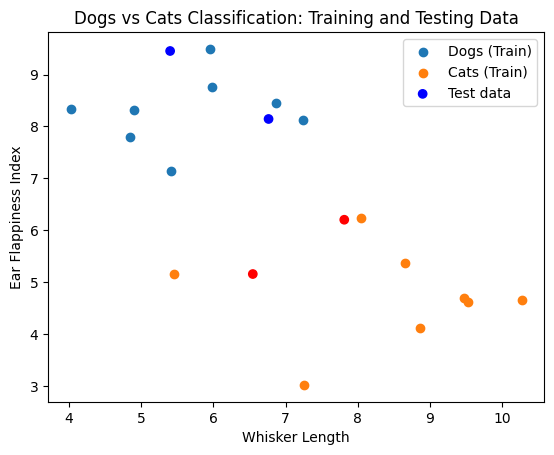

In [12]:
# Plot the training and testing data points

plt.scatter(X_train[y_train == 0][:,0], X_train[y_train==0][:,1], label='Dogs (Train)')
plt.scatter(X_train[y_train == 1][:,0], X_train[y_train==1][:,1], label='Cats (Train)')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='bwr', label='Test data')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dogs vs Cats Classification: Training and Testing Data')
plt.legend()
plt.show()

In [13]:
# Run the random linear classifier
K = best_k  # Number of random hypotheses to try
d = 2    # Dimensionality of the data (whisker length and ear flappiness index)
best_theta, best_theta0, training_error = random_linear_classifier(X_train[y_train == 0], X_train[y_train == 1], K, d)

In [14]:
best_theta, best_theta0

(array([-0.29742126,  0.22033608]), 0.4349841692645629)

In [15]:
# Plot the decision boundary

x_vals = np.linspace(2, 10, 10)
y_vals = -best_theta[0] / best_theta[1] * x_vals - best_theta0 / best_theta[1]

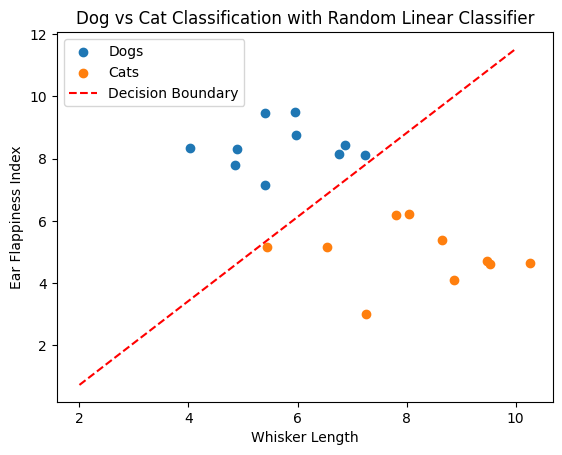

In [16]:
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label='Cats')
plt.plot(x_vals, y_vals, color='red', linestyle = '--', label='Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification with Random Linear Classifier')
plt.legend()
plt.show()

In [17]:
print(f"Training Error: {training_error}")

Training Error: 0


In [18]:
# Compute test error
test_error = compute_error(X_test[y_test == 0], X_test[y_test == 1], best_theta, best_theta0)
print(f"Test Error: {test_error}")

Test Error: 0


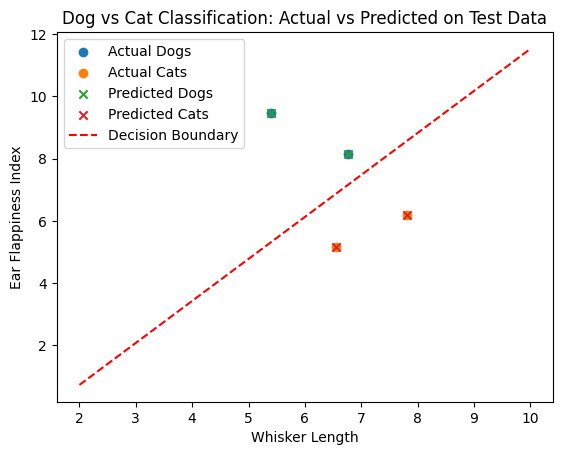

In [19]:
# Plot the actual test data and the predicted test data

plt.scatter(X_test[y_test == 0][:,0], X_test[y_test==0][:,1], label='Actual Dogs')
plt.scatter(X_test[y_test == 1][:,0], X_test[y_test==1][:,1], label='Actual Cats')

# Predict test data points using the decision boundary
predicted_labels = np.zeros_like(y_test)
for i, x in enumerate(X_test):
    if np.dot(best_theta, x) + best_theta0 < 0:
        predicted_labels[i] = 1
    
# Plot predicted and test data points
plt.scatter(X_test[predicted_labels == 0][:,0], X_test[predicted_labels==0][:,1], marker='x', label='Predicted Dogs')
plt.scatter(X_test[predicted_labels == 1][:,0], X_test[predicted_labels==1][:,1], marker='x', label='Predicted Cats')

# Plot decision boundary
plt.plot(x_vals, y_vals, color='red', linestyle = '--', label='Decision Boundary')

plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification: Actual vs Predicted on Test Data')
plt.legend()
plt.show()
